In [1]:
# Place import statements here
import numpy as np
from numpy.testing import assert_almost_equal
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# Gradient Descent - Revisited

I will lay out the process here in detail. I did not lay out any pseudocode for the formulas. If you are struggling to program the formulas, please talk to me or Mike.
If there are any issues or questions let me know.

The formula for the hypothesis: 

$$ h(x_i) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3})}} $$

Below, you will find a function defining the hypothesis. Fill it out using the formula from above. To check if it is correct, use the test variables.

## Do not change the function names if you want to use the assert statements.

In [2]:
import numpy as np

In [3]:
def hypothesis(X,coeffs):
    '''
    Input:
        -X : (numpy 2D array) containing the input data
        -coeffs: (column vector) containing the coefficients being used to get a hypothesis
    Output:
        -Hypothesis: (column vector) containing hypothesis values
    
    You can generate hypothesis values using the sigmoid (i.e. the formula from above)
    '''
    return   1/(1+np.exp(-(np.dot(X,coeffs))))

    

#Remember that you can call this function in later parts of the code

In [6]:
# Uncomment the code below to test your hypothesis function
test_x,test_coeffs = np.array([1,1,1]).reshape(1,-1),np.array([1,1,1]).reshape(-1,1)
assert_almost_equal(0.95257413,hypothesis(test_x,test_coeffs)[0][0],decimal=3)

Here is the cost function for logistic regression

$$ J(\beta) = - \frac{1}{n} \sum_{i = 1}^{n} \left[ y_i log(h(x_i)) + (1 - y_i) log(1 - h(x_i)) \right] $$  

Don't forget to take the log of the prediction or else the assert statement will fail.

In [7]:
from math import log

In [8]:
np.log10(10)

1.0

In [9]:
def cost(X,y,coeffs):
    '''
    Input:
        -X: (numpy 2D array) containing the input data
        -y: (column vector) containing the labels for the input data
        -coeffs: (column vector) containing the coefficient values
    Ouput:
        -Float Value: the cost associated with using certain coefficient values

    Implement the cost function from above.
    '''
    
    h = hypothesis(X,coeffs)


    length = len(X)


    cost = -(1/length)*sum(y*(np.log(h)) + (1-y)*np.log(1-h))

    return cost



In [15]:
# Uncomment the code below to test your cost function
test_x,test_coeffs, test_y = np.array([1,2,3]).reshape(-1,1),np.array([0]).reshape(-1,1), np.array([0,0,0]).reshape(-1,1)
assert_almost_equal(cost(test_x,test_y,test_coeffs),0.69314718055994518, decimal=3)

Here is the gradient formula:

$$ \frac{\partial}{\partial \beta_j} J(\beta) = \frac{1}{n} \sum_{i=1}^{n} \left( h(x_i) - y_i \right) x_{ij}$$  

In [16]:
test_x = np.array([[1,2],
                   [2,3],
                   [3,4]])

In [17]:
def gradient(X,y,coeffs):
    '''
    Input:
        -X: (numpy 2D array) containing the input data
        -y: (column vector) containing the labels for the input data
        -coeffs: (column vector) containing the coefficient values
    Output:
        -Gradient: the gradient for each of the coefficients
    
    Use the formula above to calculate gradient
    '''
    # Some help from below
    #https://bryantravissmith.com/2015/12/29/implementing-logistic-regression-from-scratch-part-2-python-code/
    

    rows,columns = np.shape(X)

    
    h = hypothesis(X,coeffs)


    grad = []
    error = h-y
    product = error*X
    
#     print(np.array(sum(product).reshape(coeffs.shape)/rows))
    return np.array(sum(product).reshape(coeffs.shape)/rows)
    

In [18]:
# Uncomment the code below to figure out if your implementation of the gradient is correct
test_x,test_coeffs, test_y = np.array([1,2,3]).reshape(-1,1),np.array([0]).reshape(-1,1), np.array([0,0,0]).reshape(-1,1)
assert_almost_equal(gradient(test_x,test_y,test_coeffs)[0][0],1.0)

In [19]:
gradient(test_x,test_y,test_coeffs)

array([[ 1.]])

Create a predict function which will predict any values strictly greater than 0.5 to be 1 when the hypothesis function is called.

In [20]:
def predict(X, coeffs):
    '''
    Input:
        -X: (numpy 2D array) containing the input data
        -coeffs: (column vector) containing the coefficient values
    Output:
        -Predictions: predicted values using a threshold of 0.5
    '''
    
    threshold = .5
    bool_t = hypothesis( X, coeffs)>threshold 
    final=[]
    for item in bool_t:
        if item ==True:
            final.append(1)
        else:
            final.append(0)
            
   
    return np.array(final)
    

In [21]:
# Uncomment the code below to figure out if your implementation of the predict function is correct
test_x,test_coeffs = np.array([1,1,1]).reshape(1,-1),np.array([1,1,1]).reshape(-1,1)
assert_almost_equal(predict(test_x, test_coeffs),1,decimal=3)

We are now going to implement gradient descent in the fit function (we are going to treat our class like an sklearn class). For now to see if everything is working we will just implement gradient descent (and tweak some of the code to take care of some functionality we might want). Below is the algorithm for gradient descent.

    Gradient Descent:
        input: J: optimization function (cost function)
               alpha: learning rate
               n: number of iterations
        output: local minimum of optimization function J

        initialize b (often as all 0's)
        costs = []
        repeat for n iterations:
            update b as b - alpha * gradient(J)
            append costs for updated b values  

In [22]:
def gradient_descent(X,y,alpha):
    '''
    Input:
        -X: (numpy 2D array) containing the input data
        -y: (column vector) containing the labels for the input data
        -alpha: (int) the step-size to multiply the gradient by
    Output:
        Coefficients - coefficients calculated by gradient descent
        Costs - the cost associated with each update of the coefficients
    
    For this implementation just use 10,000 iterations. MAKE SURE YOU RETURN 2 VALUES!
    '''

    coeffs=np.zeros(np.shape(X)[1]).reshape(np.shape(X)[1],1)
        # * Recall that there should be as many coefficients as features.

        # I give you this line here. if fit_intercept = True, set the intercept to 0
#         if self.fit_intercept:
#             self.coeffs = np.insert(self.coeffs, 0, 0)

        # * for each of the num_iterations, update self.coeffs at each step.
    num_interations = 5000
    grad_cost= []
    #def cost(X,y,coeffs):
    #X = X.T
    
    for n in range(num_interations):
   
        #update b as b - alpha * gradient(J)
        coeffs = coeffs- alpha*gradient(X,y,coeffs)
        grad_cost.append(cost(X,y,coeffs))
    grad_cost = np.array(grad_cost)
    #print(grad_cost,'grad cost')
    #print(coeffs, ' coeffs')
    
    
    return coeffs, grad_cost

In [23]:
#1/(1+np.exp(-(np.dot(X,coeffs))))

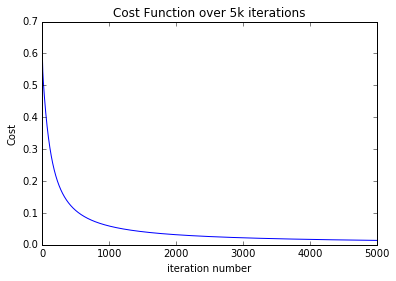

In [27]:
# Uncomment the code below to figure out if your implementation of gradient_descent is correct
# The code depends on your functions from above so make sure those are correct
# Use should be generating a plot of the costs it should look like the graph below.


test_x, test_alpha, test_y = load_iris().data, 0.01, (load_iris().target >= 1).astype(int).reshape(-1,1)
coeffs, costs = gradient_descent(test_x,test_y,test_alpha)
assert_almost_equal(accuracy_score(predict(test_x,coeffs),test_y.flatten()),1.0, decimal = 3)
plt.plot(costs)
plt.xlabel('iteration number')
plt.ylabel('Cost')
plt.title('Cost Function over 5k iterations')

Now that we have all the parts of gradient descent, let's put this in a class. PLEASE DO NOT JUST COPY AND PASTE YOUR FUNCTIONS FROM ABOVE. You should use them to ensure your implementation is correct, but the class should be set up differently. 

## Fun Fact: Notice there are functions that have 1 underscore before them (for example __hypothesis). In python programming, these are usually considered to be private functions. Unlike C/C++, these functions can be called by users (so they are not really private). The idea behind private functions is that a user would most likely never call this function, but you need it in order to perform operations for functions that users will call. For example, it can be argued that users will never care about what the gradient  or hypothesis for a given example will be. Thus, you can keep these hidden, as users will most likely only care about fitting the model and predicting on new values. 

In [28]:
x = np.array([[1,2],
             [1,2],
             [0,1],
             [2,4]])

In [29]:
z = np.zeros((np.shape(x)))
print(z)
for col_idx,i in enumerate(x.T):
    print(i,'i')
    print(i-np.mean(i),'mean out')
    print((i-np.mean(i))/np.std(i),'calc')
    
    z.T[col_idx] = np.array((i-np.mean(i))/np.std(i))
    
z

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[1 1 0 2] i
[ 0.  0. -1.  1.] mean out
[ 0.          0.         -1.41421356  1.41421356] calc
[2 2 1 4] i
[-0.25 -0.25 -1.25  1.75] mean out
[-0.22941573 -0.22941573 -1.14707867  1.60591014] calc


array([[ 0.        , -0.22941573],
       [ 0.        , -0.22941573],
       [-1.41421356, -1.14707867],
       [ 1.41421356,  1.60591014]])

In [30]:
class LogReg(object):
    
    def __init__(self, alpha = 0.01,num_iterations = 10000, fit_intercept = True, normalize = False):
        # I have given the inputs that this class should take. Please set them as class 
        # attributes so that you can call them throughout the class
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        
        
        # Now add a coefficients variable so it does not need to be passed from function to function
        
        self.coeffs = None
        # Also, add a scores variable which is a list that will hold the costs associated with
        # each update of the coefficients
        
        if self.normalize:
            self.mu = None
            self.sigma = None
        if self.fit_intercept:
            self.n=None
            self.m=None
        
        # You might want to store mu and sigma if normalize is true. For now leave them as None
        
        # Another thing you can do is store n and m (number of rows and columns in X). However,
        # be careful! If fit intercept is true then the value m will change. Store them as None for now. 
        
    
    def fit(self, X, y):
        '''
        Input:
            -X: (numpy 2D array) containing the input data
            -y: (column vector) containing the labels for the input data
        Output:
            None

        This is where gradient descent will be happening. However, notice we are just inputting 
        X and Y. Thus the other variables you will have to get from the attributes of the class.
        '''
        # If fit_intercept is true add a column of ones before the data. I will give you this code below.
        if self.fit_intercept:
            X = np.hstack((np.ones((X.shape[0], 1)), X))

        
        # If normalize is true, normalize the data.



        if self.normalize:
            norm_x = np.zeros((np.shape(X)))
                
            for col_idx,col in enumerate(X.T):
                norm_x.T[col_idx]=(col-np.mean(col))/np.std(col)
            
        
            X = norm_x
        else:
            pass
        # Now that we are done with transformations, save the n and m values.
        
        # Also, initialize coefficients to be 0
      
        
        # Finally, perform gradient descent. Get num_iterations and alpha from the atrributes
        # Don't forget to store the costs for the updated coefficients
        #############gradient descent
        
        self.coeffs=np.zeros(np.shape(X)[1]).reshape(np.shape(X)[1],1)
        print(np.shape(self.coeffs),'shape of coefficients')

        #self.num_iteration
        self.grad_cost = []
        #def cost(X,y,coeffs):
        #X = X.T

        for n in range(self.num_iterations):

            #update b as b - alpha * gradient(J)
            self.coeffs = self.coeffs- self.alpha*gradient(X,y,self.coeffs)
            self.grad_cost.append(cost(X,y,self.coeffs))
        self.grad_cost = np.array(self.grad_cost)
        
        #print(grad_cost,'grad cost')
        #print(coeffs, ' coeffs')



    
    def hypothesis(X,coeffs):
        '''
        Input:
            -X : (numpy 2D array) containing the input data
            -coeffs: (column vector) containing the coefficients being used to get a hypothesis
        Output:
            -Hypothesis: (column vector) containing hypothesis values

        You can generate hypothesis values using the sigmoid (i.e. the formula from above)
        '''
        return   1/(1+np.exp(-(np.dot(X,coeffs))))


    def _gradient(self,X,y):
        '''
        Input:
            -X: (numpy 2D array) containing the input data
            -y: (column vector) containing the labels for the input data
        Output:
            -Gradient: the gradient for each of the coefficients
        '''        
        rows,columns = np.shape(X)

    
        h = hypothesis(X,coeffs)


        grad = []
        error = h-y
        product = error*X

        #     print(np.array(sum(product).reshape(coeffs.shape)/rows))
        return np.array(sum(product).reshape(self.coeffs.shape)/rows)
    
    
    def _cost(self,X,y):
        '''
        Input:
            -X: (numpy 2D array) containing the input data
            -y: (column vector) containing the labels for the input data
        Ouput:
            -Float Value: the cost associated with using certain coefficient values
        '''
        h = hypothesis(X,self.coeffs)


        length = len(X)


        cost = -(1/length)*sum(y*(np.log(h)) + (1-y)*np.log(1-h))

        return cost


    def predict(self,X):
        '''
        Input:
            -X: (numpy 2D array) containing the input data
        Output:
            -Predictions: predicted values using a threshold of 0.5
        '''        
        threshold = .5
        bool_t = hypothesis( X, coeffs)>threshold 
        final=[]
        for item in bool_t:
            if item ==True:
                final.append(1)
            else:
                final.append(0)


        return np.array(final)     
    
    def plot_scores(self):
        '''
        Input:
            -None
        Ouput:
            -Line plot showing how scores decrease
        '''
        pass
    
        
        
        
    
        plt.plot(self.grad_cost)
        plt.xlabel('iteration number')
        plt.ylabel('Cost')
        plt.title('Cost Function over {} iterations'.format(self.num_iterations))

(5, 1) shape of coefficients
1.0


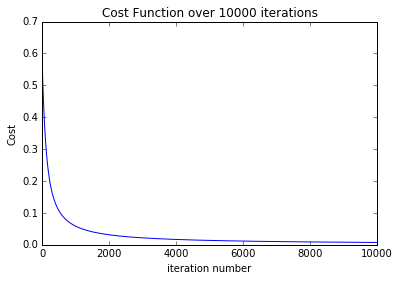

In [31]:
# This is how your class should be called.
X = load_iris().data
y = (load_iris().target >= 1).astype(int).reshape(-1,1)
logreg = LogReg()
logreg.fit(X,y)
print(accuracy_score(logreg.predict(X),y.flatten()))
logreg.plot_scores()